In [1]:
#Perform logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
from collections import Counter

#to find encoding, do following:
# with open('Case_1_Data_device_failure.csv') as f:
#     print(f)

dataset = pd.read_csv('Case_1_Data_device_failure.csv', encoding='cp1252') 

#checked for missing values but found none after using dataset.dropna()

#create a new dataframe where the rows are devices and columns are the standard deviations for attributes 2, 4, 7, 8 and failure
att2=dataset.groupby('device').apply(
            lambda group:  #find std of attribute
                np.sign(group['attribute2'].std())
        )
att4=dataset.groupby('device').apply(
            lambda group:  #find std of attribute
                np.sign(group['attribute4'].std())
        )
att7=dataset.groupby('device').apply(
            lambda group:  #find std of attribute
                np.sign(group['attribute7'].std())
        )

failure=dataset.groupby('device').apply(
            lambda group:  #find max of attribute
                np.sign(group['failure'].max())
        )
df_new=pd.DataFrame({'att2':att2,'att4':att4, 'att7':att7, 'failure':failure})
df_new = df_new.dropna()  #there was one bad row with nan value

#Define X and Y using dataset
X = df_new.iloc[:,0:-1].values
Y = df_new.iloc[:,3].values

#Splitting the dataset into the Training set and Test set
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.2, random_state = 2)

#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.fit_transform(X_test)

#Fitting Logistic Regression to the Training set
classifier = LogisticRegression()
classifier.fit(X_train,Y_train)

#Predicting the Test set results
Y_pred = classifier.predict(X_test)

#Making the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_pred)
print(f'accuracy:{cm.trace()/len(Y_test)}')
print(f'confusion matrix:\n{cm}')

#check the precision, recall, and f1-score
from sklearn.metrics import classification_report
print(f'classification report:\n{classification_report(Y_test,Y_pred)}')
#the precision, recall, and f1-score are high for class 0 but low for class 1.  This is not good.  We want high scores for both.
#the recall for the minority class is 0, meaning none of the faulty devices is captured by the model.  Recall for minority
#is how many of the faulty devices the model correctly identifies out of all the faulty devices,
#and this is what we want to maximize.  Precision for minority
#, on the other hand, is how many of the model's predictions of faultiness are correct.

accuracy:0.9273504273504274
confusion matrix:
[[210   4]
 [ 13   7]]
classification report:
              precision    recall  f1-score   support

           0       0.94      0.98      0.96       214
           1       0.64      0.35      0.45        20

    accuracy                           0.93       234
   macro avg       0.79      0.67      0.71       234
weighted avg       0.92      0.93      0.92       234



In [2]:
#KNN 

#Perform cross validation to find the optimal number of neighbors
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
k_range = list(range(1, 31))
param_grid = dict(n_neighbors=k_range)
  
# defining parameter range
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy', return_train_score=False,verbose=1)
  
# fitting the model for grid search
grid_search=grid.fit(X_train, Y_train)
# print optimal number of neighbors
print(grid_search.best_params_)
# print corresponding training accuracy
accuracy = grid_search.best_score_ *100
print("Accuracy for our training dataset with tuning is : {:.2f}%".format(accuracy) )

#Perform KNN using k=29 neighbors
from sklearn.neighbors import KNeighborsClassifier
classifierKNN = KNeighborsClassifier(n_neighbors = 7, metric = 'minkowski', p =2) #euclidean metric
classifierKNN.fit(X_train,Y_train)

#Predicting the Test set results
Y_pred = classifierKNN.predict(X_test)

#Making the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_pred)
print(f'accuracy:{cm.trace()/len(Y_test)}')
print(f'confusion matrix:\n{cm}')

#check the precision, recall, and f1-score
from sklearn.metrics import classification_report
print(f'classification report:\n{classification_report(Y_test,Y_pred)}')

Fitting 10 folds for each of 30 candidates, totalling 300 fits
{'n_neighbors': 7}
Accuracy for our training dataset with tuning is : 93.79%
accuracy:0.9188034188034188
confusion matrix:
[[208   6]
 [ 13   7]]
classification report:
              precision    recall  f1-score   support

           0       0.94      0.97      0.96       214
           1       0.54      0.35      0.42        20

    accuracy                           0.92       234
   macro avg       0.74      0.66      0.69       234
weighted avg       0.91      0.92      0.91       234



In [3]:
#Linear SVM

#Perform cross validation to find the optimal C value for SVM
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
svc = SVC()
C_range = list(np.arange(0.05,1,.05))
parameters = {'kernel':['linear'], 'C':C_range}
  
grid = GridSearchCV(svc, parameters, cv=10, scoring='accuracy', verbose=1)
  
# fitting the model for grid search
grid_search=grid.fit(X_train, Y_train) 
# print optimal C value
print(grid_search.best_params_)
# print corresponding training accuracy
accuracy = grid_search.best_score_ *100
print("Accuracy for our training dataset with tuning is : {:.2f}%".format(accuracy) )
# print best estimator
print(grid.best_estimator_)

#SVM using optimal C
from sklearn.svm import SVC
svclassifier = SVC(kernel='linear', C=.05, decision_function_shape='ovr')
svclassifier.fit(X_train, Y_train)  

#Predicting the Test set results
Y_pred = svclassifier.predict(X_test)

#Making the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_pred)
print(f'accuracy:{cm.trace()/len(Y_test)}')
print(f'confusion matrix:\n{cm}')

#check the precision, recall, and f1-score
from sklearn.metrics import classification_report
print(f'classification report:\n{classification_report(Y_test,Y_pred)}')

Fitting 10 folds for each of 19 candidates, totalling 190 fits
{'C': 0.05, 'kernel': 'linear'}
Accuracy for our training dataset with tuning is : 91.65%
SVC(C=0.05, kernel='linear')
accuracy:0.9102564102564102
confusion matrix:
[[209   5]
 [ 16   4]]
classification report:
              precision    recall  f1-score   support

           0       0.93      0.98      0.95       214
           1       0.44      0.20      0.28        20

    accuracy                           0.91       234
   macro avg       0.69      0.59      0.61       234
weighted avg       0.89      0.91      0.89       234



In [4]:
#Kernal SVM

#Perform cross validation to find the optimal C value for kernel SVM
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
svc = SVC()
C_range = list(np.arange(1,20,.5))
parameters = {'kernel':['rbf'], 'C':C_range}
  
grid = GridSearchCV(svc, parameters, cv=10, scoring='accuracy', verbose=1)
  
# fitting the model for grid search
grid_search=grid.fit(X_train, Y_train) 
# print optimal C value
print(grid_search.best_params_)
# print corresponding training accuracy
accuracy = grid_search.best_score_ *100
print("Accuracy for our training dataset with tuning is : {:.2f}%".format(accuracy) )
# print best estimator
print(grid.best_estimator_)

#Kernel SVM; use gaussian rbf kernel and optimal C value

svclassifier = SVC(kernel='rbf', C=1)
svclassifier.fit(X_train, Y_train)  

#Predicting the Test set results
Y_pred = svclassifier.predict(X_test)

#Making the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_pred)
print(f'accuracy:{cm.trace()/len(Y_test)}')
print(f'confusion matrix:\n{cm}')

#check the precision, recall, and f1-score
from sklearn.metrics import classification_report
print(f'classification report:\n{classification_report(Y_test,Y_pred)}')

Fitting 10 folds for each of 38 candidates, totalling 380 fits
{'C': 1.0, 'kernel': 'rbf'}
Accuracy for our training dataset with tuning is : 93.58%
SVC()
accuracy:0.9188034188034188
confusion matrix:
[[208   6]
 [ 13   7]]
classification report:
              precision    recall  f1-score   support

           0       0.94      0.97      0.96       214
           1       0.54      0.35      0.42        20

    accuracy                           0.92       234
   macro avg       0.74      0.66      0.69       234
weighted avg       0.91      0.92      0.91       234



In [5]:
#Perform Naive Bayes

#Fitting Naive Bayes to the Training set
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train,Y_train)

#Predicting the Test set results
Y_pred = model.predict(X_test)

#Making the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_pred)
print(f'accuracy:{cm.trace()/len(Y_test)}')
print(f'confusion matrix:\n{cm}')

#check the precision, recall, and f1-score
from sklearn.metrics import classification_report
print(f'classification report:\n{classification_report(Y_test,Y_pred)}')

accuracy:0.905982905982906
confusion matrix:
[[199  15]
 [  7  13]]
classification report:
              precision    recall  f1-score   support

           0       0.97      0.93      0.95       214
           1       0.46      0.65      0.54        20

    accuracy                           0.91       234
   macro avg       0.72      0.79      0.74       234
weighted avg       0.92      0.91      0.91       234



In [6]:
#Fitting decision tree classifier to the Training set
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion='entropy', random_state=0)
classifier.fit(X_train,Y_train)

#Predicting the Test set results
Y_pred = classifier.predict(X_test)

#Making the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_pred)
print(f'accuracy:{cm.trace()/len(Y_test)}')
print(f'confusion matrix:\n{cm}')

#check the precision, recall, and f1-score
from sklearn.metrics import classification_report
print(f'classification report:\n{classification_report(Y_test,Y_pred)}')

accuracy:0.9188034188034188
confusion matrix:
[[209   5]
 [ 14   6]]
classification report:
              precision    recall  f1-score   support

           0       0.94      0.98      0.96       214
           1       0.55      0.30      0.39        20

    accuracy                           0.92       234
   macro avg       0.74      0.64      0.67       234
weighted avg       0.90      0.92      0.91       234



In [7]:
#Perform Random Forest

#Fitting random forest classifier to the Training set
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(criterion='entropy', n_estimators=100, random_state=0)
classifier.fit(X_train,Y_train)

#Predicting the Test set results
Y_pred_rf = classifier.predict(X_test)

#Making the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_pred_rf)
print(f'accuracy:{cm.trace()/len(Y_test)}')
print(f'confusion matrix:\n{cm}')

#check the precision, recall, and f1-score
from sklearn.metrics import classification_report
print(f'classification report:\n{classification_report(Y_test,Y_pred_rf)}')

accuracy:0.9188034188034188
confusion matrix:
[[208   6]
 [ 13   7]]
classification report:
              precision    recall  f1-score   support

           0       0.94      0.97      0.96       214
           1       0.54      0.35      0.42        20

    accuracy                           0.92       234
   macro avg       0.74      0.66      0.69       234
weighted avg       0.91      0.92      0.91       234



In [8]:
#Perform XGBoost

#Fitting xgboost classifier to the Training set
import xgboost as xgb
model = xgb.XGBClassifier(n_estimators=500, max_depth=2)
model.fit(X_train, Y_train)
#Predicting the Test set results
Y_pred_xgb = model.predict(X_test)

#Making the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_pred_xgb)
print(f'accuracy:{cm.trace()/len(Y_test)}')
print(f'confusion matrix:\n{cm}')

#check the precision, recall, and f1-score
from sklearn.metrics import classification_report
print(f'classification report:\n{classification_report(Y_test,Y_pred_xgb)}')

[18:20:10] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Richard Han\anaconda3\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\Richard Han\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


accuracy:0.9188034188034188
confusion matrix:
[[209   5]
 [ 14   6]]
classification report:
              precision    recall  f1-score   support

           0       0.94      0.98      0.96       214
           1       0.55      0.30      0.39        20

    accuracy                           0.92       234
   macro avg       0.74      0.64      0.67       234
weighted avg       0.90      0.92      0.91       234



In [9]:
from sklearn.ensemble import AdaBoostClassifier
clf = AdaBoostClassifier(n_estimators=500, random_state=0)
clf.fit(X_train, Y_train)
#Predicting the Test set results
Y_pred = clf.predict(X_test)

#Making the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_pred)
print(f'accuracy:{cm.trace()/len(Y_test)}')
print(f'confusion matrix:\n{cm}')

#check the precision, recall, and f1-score
from sklearn.metrics import classification_report
print(f'classification report:\n{classification_report(Y_test,Y_pred)}')

accuracy:0.9273504273504274
confusion matrix:
[[210   4]
 [ 13   7]]
classification report:
              precision    recall  f1-score   support

           0       0.94      0.98      0.96       214
           1       0.64      0.35      0.45        20

    accuracy                           0.93       234
   macro avg       0.79      0.67      0.71       234
weighted avg       0.92      0.93      0.92       234



In [10]:
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,
     max_depth=2, random_state=0).fit(X_train, Y_train)

#Predicting the Test set results
Y_pred = clf.predict(X_test)

#Making the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_pred)
print(f'accuracy:{cm.trace()/len(Y_test)}')
print(f'confusion matrix:\n{cm}')

#check the precision, recall, and f1-score
from sklearn.metrics import classification_report
print(f'classification report:\n{classification_report(Y_test,Y_pred)}')

accuracy:0.9102564102564102
confusion matrix:
[[206   8]
 [ 13   7]]
classification report:
              precision    recall  f1-score   support

           0       0.94      0.96      0.95       214
           1       0.47      0.35      0.40        20

    accuracy                           0.91       234
   macro avg       0.70      0.66      0.68       234
weighted avg       0.90      0.91      0.90       234



In [11]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               512       
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dense_2 (Dense)             (None, 1)                 129       
                                                                 
Total params: 17,153
Trainable params: 17,153
Non-trainable params: 0
_________________________________________________________________
Epoch 1/150
10/10 [==============================] - 1s 19ms/step - loss: 0.6338 - accuracy: 0.9208 - val_loss: 0.5895 - val_accuracy: 0.9145
Epoch 2/150
10/10 [==============================] - 0s 3ms/step - loss: 0.5292 - accuracy: 0.9400 - val_loss: 0.5027 - val_accuracy: 0.9188
Epoch 3/150
10/10 [==============

10/10 [==============================] - 0s 3ms/step - loss: 0.1956 - accuracy: 0.9368 - val_loss: 0.2212 - val_accuracy: 0.9188
Epoch 54/150
10/10 [==============================] - 0s 3ms/step - loss: 0.1950 - accuracy: 0.9379 - val_loss: 0.2178 - val_accuracy: 0.9188
Epoch 55/150
10/10 [==============================] - 0s 3ms/step - loss: 0.1959 - accuracy: 0.9379 - val_loss: 0.2198 - val_accuracy: 0.9188
Epoch 56/150
10/10 [==============================] - 0s 3ms/step - loss: 0.1949 - accuracy: 0.9390 - val_loss: 0.2227 - val_accuracy: 0.9188
Epoch 57/150
10/10 [==============================] - 0s 3ms/step - loss: 0.1956 - accuracy: 0.9358 - val_loss: 0.2228 - val_accuracy: 0.9188
Epoch 58/150
10/10 [==============================] - 0s 4ms/step - loss: 0.1955 - accuracy: 0.9379 - val_loss: 0.2194 - val_accuracy: 0.9188
Epoch 59/150
10/10 [==============================] - 0s 3ms/step - loss: 0.1957 - accuracy: 0.9379 - val_loss: 0.2191 - val_accuracy: 0.9188
Epoch 60/150
10/10 

Epoch 111/150
10/10 [==============================] - 0s 4ms/step - loss: 0.1954 - accuracy: 0.9379 - val_loss: 0.2190 - val_accuracy: 0.9188
Epoch 112/150
10/10 [==============================] - 0s 2ms/step - loss: 0.1951 - accuracy: 0.9390 - val_loss: 0.2211 - val_accuracy: 0.9188
Epoch 113/150
10/10 [==============================] - 0s 4ms/step - loss: 0.1949 - accuracy: 0.9379 - val_loss: 0.2212 - val_accuracy: 0.9188
Epoch 114/150
10/10 [==============================] - 0s 3ms/step - loss: 0.1955 - accuracy: 0.9379 - val_loss: 0.2236 - val_accuracy: 0.9188
Epoch 115/150
10/10 [==============================] - 0s 7ms/step - loss: 0.1960 - accuracy: 0.9379 - val_loss: 0.2249 - val_accuracy: 0.9188
Epoch 116/150
10/10 [==============================] - 0s 3ms/step - loss: 0.1959 - accuracy: 0.9379 - val_loss: 0.2226 - val_accuracy: 0.9188
Epoch 117/150
10/10 [==============================] - 0s 4ms/step - loss: 0.1960 - accuracy: 0.9379 - val_loss: 0.2223 - val_accuracy: 0.9188

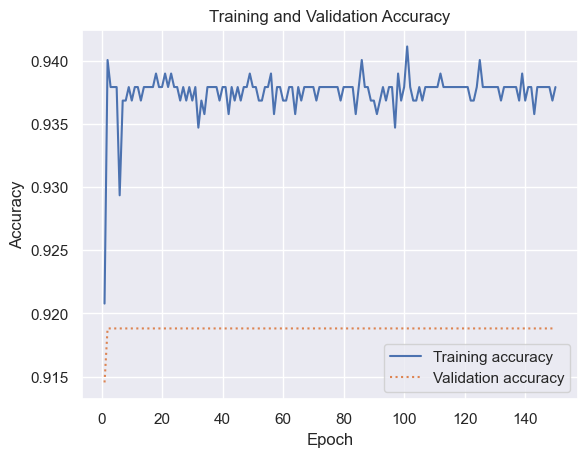

In [12]:
#Neural Networks

#Importing the Keras libraries and packages

from keras.models import Sequential
from keras.layers import Dense
 
model = Sequential() 
model.add(Dense(128, activation='relu', input_dim=3))
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid')) 
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy']) 
model.summary()

hist = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=150, batch_size=100)

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
 
acc = hist.history['accuracy']
val = hist.history['val_accuracy']
epochs = range(1, len(acc) + 1)
 
plt.plot(epochs, acc, '-', label='Training accuracy')
plt.plot(epochs, val, ':', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.plot()

y_predicted = model.predict(X_test) > 0.5

#Making the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, y_predicted)
print(f'accuracy:{cm.trace()/len(Y_test)}')
print(f'confusion matrix:\n{cm}')

#check the precision, recall, and f1-score
from sklearn.metrics import classification_report
print(f'classification report:\n{classification_report(Y_test,y_predicted)}')

In [13]:
#different architecture

model = Sequential() 
model.add(Dense(4, activation='relu', input_dim=3))
model.add(Dense(1, activation='sigmoid')) 
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy']) 
model.summary()

hist = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=150, batch_size=100)

y_predicted = model.predict(X_test) > 0.5

#Making the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, y_predicted)
print(f'accuracy:{cm.trace()/len(Y_test)}')
print(f'confusion matrix:\n{cm}')

#check the precision, recall, and f1-score
from sklearn.metrics import classification_report
print(f'classification report:\n{classification_report(Y_test,y_predicted)}')

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 4)                 16        
                                                                 
 dense_4 (Dense)             (None, 1)                 5         
                                                                 
Total params: 21
Trainable params: 21
Non-trainable params: 0
_________________________________________________________________
Epoch 1/150
10/10 [==============================] - 0s 10ms/step - loss: 0.7108 - accuracy: 0.8844 - val_loss: 0.6723 - val_accuracy: 0.9145
Epoch 2/150
10/10 [==============================] - 0s 3ms/step - loss: 0.6923 - accuracy: 0.8844 - val_loss: 0.6558 - val_accuracy: 0.9145
Epoch 3/150
10/10 [==============================] - 0s 3ms/step - loss: 0.6744 - accuracy: 0.8844 - val_loss: 0.6399 - val_accuracy: 0.9145
Epoch 4/150
10/10 [===========

Epoch 54/150
10/10 [==============================] - 0s 3ms/step - loss: 0.2671 - accuracy: 0.9261 - val_loss: 0.2784 - val_accuracy: 0.9145
Epoch 55/150
10/10 [==============================] - 0s 2ms/step - loss: 0.2644 - accuracy: 0.9261 - val_loss: 0.2758 - val_accuracy: 0.9145
Epoch 56/150
10/10 [==============================] - 0s 2ms/step - loss: 0.2617 - accuracy: 0.9261 - val_loss: 0.2734 - val_accuracy: 0.9145
Epoch 57/150
10/10 [==============================] - 0s 3ms/step - loss: 0.2594 - accuracy: 0.9261 - val_loss: 0.2710 - val_accuracy: 0.9145
Epoch 58/150
10/10 [==============================] - 0s 2ms/step - loss: 0.2569 - accuracy: 0.9261 - val_loss: 0.2687 - val_accuracy: 0.9145
Epoch 59/150
10/10 [==============================] - 0s 3ms/step - loss: 0.2546 - accuracy: 0.9293 - val_loss: 0.2665 - val_accuracy: 0.9145
Epoch 60/150
10/10 [==============================] - 0s 2ms/step - loss: 0.2523 - accuracy: 0.9293 - val_loss: 0.2645 - val_accuracy: 0.9145
Epoch 

10/10 [==============================] - 0s 3ms/step - loss: 0.2059 - accuracy: 0.9293 - val_loss: 0.2223 - val_accuracy: 0.9145
Epoch 112/150
10/10 [==============================] - 0s 2ms/step - loss: 0.2057 - accuracy: 0.9293 - val_loss: 0.2220 - val_accuracy: 0.9145
Epoch 113/150
10/10 [==============================] - 0s 2ms/step - loss: 0.2054 - accuracy: 0.9293 - val_loss: 0.2219 - val_accuracy: 0.9145
Epoch 114/150
10/10 [==============================] - 0s 3ms/step - loss: 0.2052 - accuracy: 0.9293 - val_loss: 0.2218 - val_accuracy: 0.9145
Epoch 115/150
10/10 [==============================] - 0s 2ms/step - loss: 0.2050 - accuracy: 0.9293 - val_loss: 0.2215 - val_accuracy: 0.9145
Epoch 116/150
10/10 [==============================] - 0s 3ms/step - loss: 0.2047 - accuracy: 0.9293 - val_loss: 0.2214 - val_accuracy: 0.9145
Epoch 117/150
10/10 [==============================] - 0s 3ms/step - loss: 0.2046 - accuracy: 0.9293 - val_loss: 0.2212 - val_accuracy: 0.9145
Epoch 118/150

In [14]:
#We have an imbalanced dataset.  We can increase recall by giving more weight to the minority class
#Fitting Logistic Regression to the Training set
classifier = LogisticRegression(class_weight='balanced')
classifier.fit(X_train,Y_train)

#Predicting the Test set results
Y_pred = classifier.predict(X_test)

#Making the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_pred)
print(f'accuracy:{cm.trace()/len(Y_test)}')
print(f'confusion matrix:\n{cm}')

#check the precision, recall, and f1-score
from sklearn.metrics import classification_report
print(f'classification report:\n{classification_report(Y_test,Y_pred)}')

accuracy:0.905982905982906
confusion matrix:
[[199  15]
 [  7  13]]
classification report:
              precision    recall  f1-score   support

           0       0.97      0.93      0.95       214
           1       0.46      0.65      0.54        20

    accuracy                           0.91       234
   macro avg       0.72      0.79      0.74       234
weighted avg       0.92      0.91      0.91       234



In [15]:
pip install -U imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [16]:
#try oversampling and undersampling to get around the imbalanced data problem
import imblearn
# Oversampling and under sampling
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler, NearMiss
from collections import Counter

In [17]:
#Oversampling approach
#recall for the minority class is important because we want to identify as many faulty devices as possible and it's not that bad
#if we identify some good devices as faulty, whereas it would be bad if we identify as good some faulty devices
#So, we want to maximize recall for minority class

# Randomly over-sample the minority class
ros = RandomOverSampler(random_state=42, sampling_strategy='minority')
X_train_ros, Y_train_ros= ros.fit_resample(X_train, Y_train)
# Check the number of records after over sampling
print(sorted(Counter(Y_train_ros).items()))

#Fitting Logistic Regression to the randomly over-sampled Training set
classifier_ros = LogisticRegression()
classifier_ros.fit(X_train_ros,Y_train_ros)

#Predicting the Test set results
Y_pred_ros = classifier_ros.predict(X_test)

#Making the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_pred_ros)
print(f'accuracy:{cm.trace()/len(Y_test)}')
print(f'confusion matrix:\n{cm}')

#check the precision, recall, and f1-score
from sklearn.metrics import classification_report
print(f'classification report:\n{classification_report(Y_test,Y_pred_ros)}')

[(0, 848), (1, 848)]
accuracy:0.905982905982906
confusion matrix:
[[199  15]
 [  7  13]]
classification report:
              precision    recall  f1-score   support

           0       0.97      0.93      0.95       214
           1       0.46      0.65      0.54        20

    accuracy                           0.91       234
   macro avg       0.72      0.79      0.74       234
weighted avg       0.92      0.91      0.91       234



In [18]:
#Adaboost with oversampling
from sklearn.ensemble import AdaBoostClassifier
clf = AdaBoostClassifier(n_estimators=500, random_state=0)
clf.fit(X_train_ros, Y_train_ros)
#Predicting the Test set results
Y_pred = clf.predict(X_test)

#Making the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_pred)
print(f'accuracy:{cm.trace()/len(Y_test)}')
print(f'confusion matrix:\n{cm}')

#check the precision, recall, and f1-score
from sklearn.metrics import classification_report
print(f'classification report:\n{classification_report(Y_test,Y_pred)}')

accuracy:0.905982905982906
confusion matrix:
[[199  15]
 [  7  13]]
classification report:
              precision    recall  f1-score   support

           0       0.97      0.93      0.95       214
           1       0.46      0.65      0.54        20

    accuracy                           0.91       234
   macro avg       0.72      0.79      0.74       234
weighted avg       0.92      0.91      0.91       234



In [19]:
#GradientBoosting with oversampling
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,
     max_depth=2, random_state=0).fit(X_train_ros, Y_train_ros)

#Predicting the Test set results
Y_pred = clf.predict(X_test)

#Making the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_pred)
print(f'accuracy:{cm.trace()/len(Y_test)}')
print(f'confusion matrix:\n{cm}')

#check the precision, recall, and f1-score
from sklearn.metrics import classification_report
print(f'classification report:\n{classification_report(Y_test,Y_pred)}')

accuracy:0.905982905982906
confusion matrix:
[[199  15]
 [  7  13]]
classification report:
              precision    recall  f1-score   support

           0       0.97      0.93      0.95       214
           1       0.46      0.65      0.54        20

    accuracy                           0.91       234
   macro avg       0.72      0.79      0.74       234
weighted avg       0.92      0.91      0.91       234



In [20]:
#Perform Random Forest with oversampling

#Fitting random forest classifier to the Training set
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(criterion='entropy', n_estimators=100, random_state=0)
classifier.fit(X_train_ros,Y_train_ros)

#Predicting the Test set results
Y_pred_rf = classifier.predict(X_test)

#Making the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_pred_rf)
print(f'accuracy:{cm.trace()/len(Y_test)}')
print(f'confusion matrix:\n{cm}')

#check the precision, recall, and f1-score
from sklearn.metrics import classification_report
print(f'classification report:\n{classification_report(Y_test,Y_pred_rf)}')

accuracy:0.905982905982906
confusion matrix:
[[199  15]
 [  7  13]]
classification report:
              precision    recall  f1-score   support

           0       0.97      0.93      0.95       214
           1       0.46      0.65      0.54        20

    accuracy                           0.91       234
   macro avg       0.72      0.79      0.74       234
weighted avg       0.92      0.91      0.91       234



In [21]:
#Fitting decision tree classifier to the Training set with oversampling
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion='entropy', random_state=0)
classifier.fit(X_train_ros,Y_train_ros)

#Predicting the Test set results
Y_pred = classifier.predict(X_test)

#Making the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_pred)
print(f'accuracy:{cm.trace()/len(Y_test)}')
print(f'confusion matrix:\n{cm}')

#check the precision, recall, and f1-score
from sklearn.metrics import classification_report
print(f'classification report:\n{classification_report(Y_test,Y_pred)}')

accuracy:0.905982905982906
confusion matrix:
[[199  15]
 [  7  13]]
classification report:
              precision    recall  f1-score   support

           0       0.97      0.93      0.95       214
           1       0.46      0.65      0.54        20

    accuracy                           0.91       234
   macro avg       0.72      0.79      0.74       234
weighted avg       0.92      0.91      0.91       234



In [22]:
#Undersampling approach

# Randomly under sample the majority class
rus = RandomUnderSampler(random_state=42)
X_train_rus, Y_train_rus= rus.fit_resample(X_train, Y_train)
# Check the number of records after under sampling
print(sorted(Counter(Y_train_rus).items()))

#Fitting Logistic Regression to the randomly under-sampled Training set
classifier_rus = LogisticRegression()
classifier_rus.fit(X_train_rus,Y_train_rus)

#Predicting the Test set results
Y_pred_rus = classifier_rus.predict(X_test)

#Making the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_pred_rus)
print(f'accuracy:{cm.trace()/len(Y_test)}')
print(f'confusion matrix:\n{cm}')

#check the precision, recall, and f1-score
from sklearn.metrics import classification_report
print(f'classification report:\n{classification_report(Y_test,Y_pred_rus)}')

[(0, 86), (1, 86)]
accuracy:0.905982905982906
confusion matrix:
[[199  15]
 [  7  13]]
classification report:
              precision    recall  f1-score   support

           0       0.97      0.93      0.95       214
           1       0.46      0.65      0.54        20

    accuracy                           0.91       234
   macro avg       0.72      0.79      0.74       234
weighted avg       0.92      0.91      0.91       234



In [23]:
#Adaboost with undersampling
from sklearn.ensemble import AdaBoostClassifier
clf = AdaBoostClassifier(n_estimators=500, random_state=0)
clf.fit(X_train_rus, Y_train_rus)
#Predicting the Test set results
Y_pred = clf.predict(X_test)

#Making the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_pred)
print(f'accuracy:{cm.trace()/len(Y_test)}')
print(f'confusion matrix:\n{cm}')

#check the precision, recall, and f1-score
from sklearn.metrics import classification_report
print(f'classification report:\n{classification_report(Y_test,Y_pred)}')

accuracy:0.905982905982906
confusion matrix:
[[199  15]
 [  7  13]]
classification report:
              precision    recall  f1-score   support

           0       0.97      0.93      0.95       214
           1       0.46      0.65      0.54        20

    accuracy                           0.91       234
   macro avg       0.72      0.79      0.74       234
weighted avg       0.92      0.91      0.91       234



In [24]:
#GradientBoosting with undersampling
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,
     max_depth=2, random_state=0).fit(X_train_rus, Y_train_rus)

#Predicting the Test set results
Y_pred = clf.predict(X_test)

#Making the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_pred)
print(f'accuracy:{cm.trace()/len(Y_test)}')
print(f'confusion matrix:\n{cm}')

#check the precision, recall, and f1-score
from sklearn.metrics import classification_report
print(f'classification report:\n{classification_report(Y_test,Y_pred)}')

accuracy:0.905982905982906
confusion matrix:
[[199  15]
 [  7  13]]
classification report:
              precision    recall  f1-score   support

           0       0.97      0.93      0.95       214
           1       0.46      0.65      0.54        20

    accuracy                           0.91       234
   macro avg       0.72      0.79      0.74       234
weighted avg       0.92      0.91      0.91       234



In [25]:
#Perform Random Forest with undersampling

#Fitting random forest classifier to the Training set
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(criterion='entropy', n_estimators=100, random_state=0)
classifier.fit(X_train_rus,Y_train_rus)

#Predicting the Test set results
Y_pred_rf = classifier.predict(X_test)

#Making the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_pred_rf)
print(f'accuracy:{cm.trace()/len(Y_test)}')
print(f'confusion matrix:\n{cm}')

#check the precision, recall, and f1-score
from sklearn.metrics import classification_report
print(f'classification report:\n{classification_report(Y_test,Y_pred_rf)}')

accuracy:0.905982905982906
confusion matrix:
[[199  15]
 [  7  13]]
classification report:
              precision    recall  f1-score   support

           0       0.97      0.93      0.95       214
           1       0.46      0.65      0.54        20

    accuracy                           0.91       234
   macro avg       0.72      0.79      0.74       234
weighted avg       0.92      0.91      0.91       234



accuracy:0.905982905982906
confusion matrix:
[[199  15]
 [  7  13]]
classification report:
              precision    recall  f1-score   support

           0       0.97      0.93      0.95       214
           1       0.46      0.65      0.54        20

    accuracy                           0.91       234
   macro avg       0.72      0.79      0.74       234
weighted avg       0.92      0.91      0.91       234



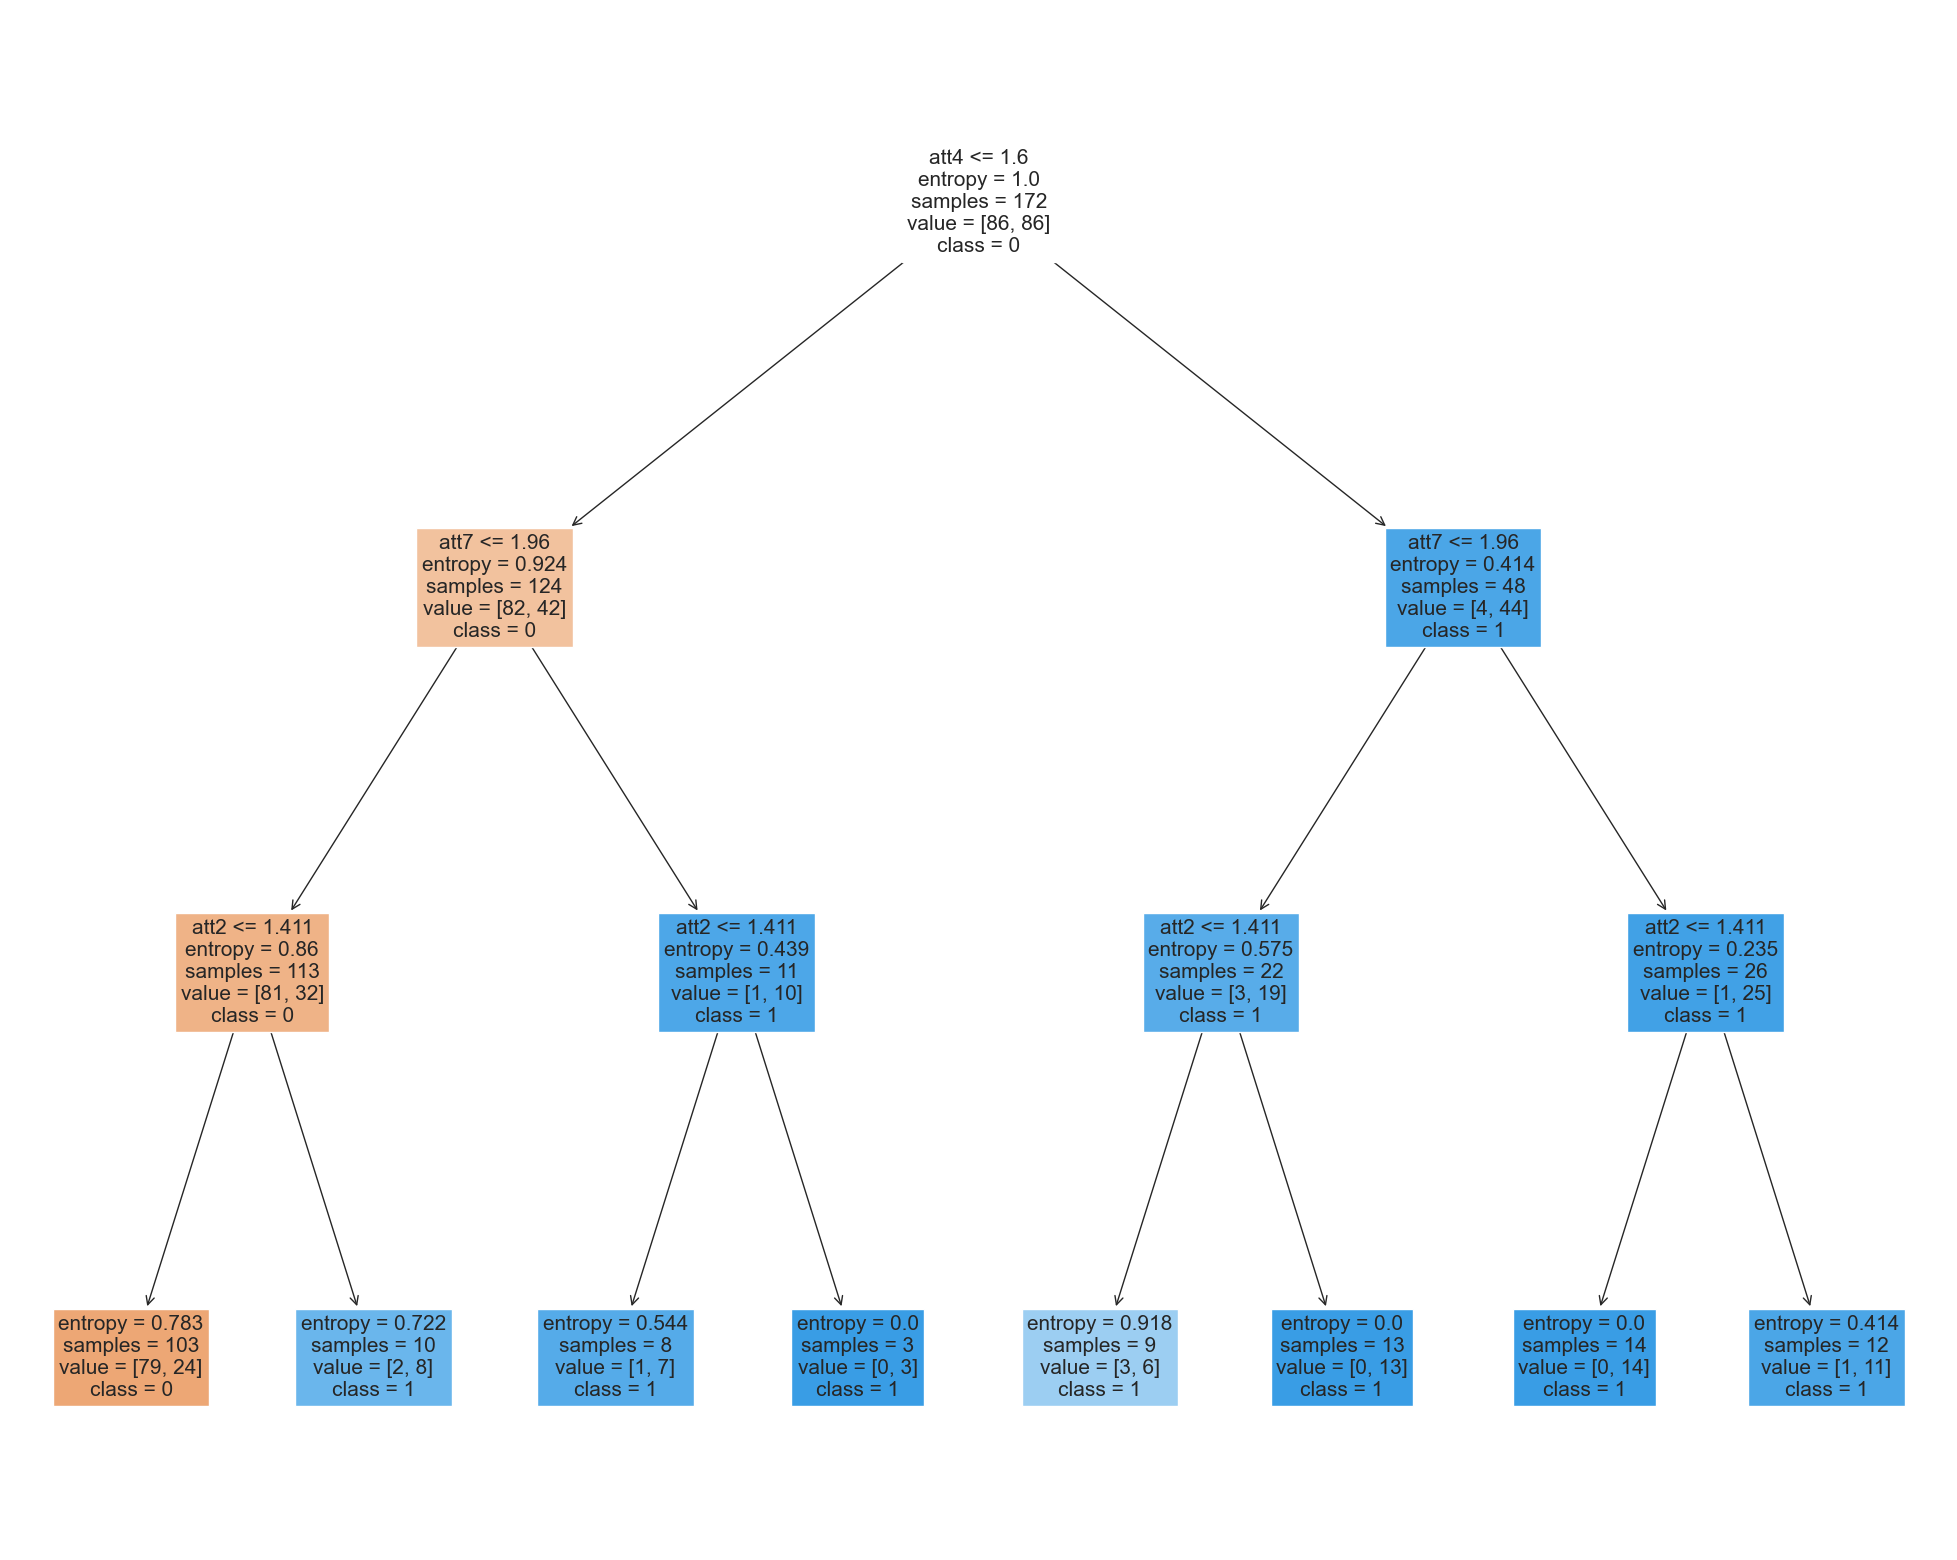

In [26]:
#Fitting decision tree classifier to the Training set with undersampling
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion='entropy', random_state=0)
classifier.fit(X_train_rus,Y_train_rus)

#Predicting the Test set results
Y_pred = classifier.predict(X_test)

#Making the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_pred)
print(f'accuracy:{cm.trace()/len(Y_test)}')
print(f'confusion matrix:\n{cm}')

#check the precision, recall, and f1-score
from sklearn.metrics import classification_report
print(f'classification report:\n{classification_report(Y_test,Y_pred)}')

from matplotlib import pyplot as plt
from sklearn import tree

fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(classifier,
                   feature_names=df_new.iloc[:,0:-1].columns,  
                   class_names=['0','1'],fontsize=15,
                   filled=True)

#the blue nodes correspond to class '1', that is, 'faulty'.  The orange nodes correspond to class '0', 'not faulty'

